In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install html5lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
#response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Neuralink')
html = response.read()
html

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0e170981-0a08-4dc4-9ac7-480868faa728","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1098027989,"wgRevisionId":1098027989,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Source attribution","All articles with dead external links","Articles with dead external links from August 2021","Articles with perm

In [ ]:
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
text

'SpaceX - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0e170981-0a08-4dc4-9ac7-480868faa728","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1098027989,"wgRevisionId":1098027989,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Source attribution","All articles with dead external links","Articles with dead external links from August 2021","Articles with permanently dead external links","CS1 errors: missing periodical","Articles with short description","Short description is differ

In [ ]:
tokens = [t for t in text.split()]
tokens

['SpaceX',
 '-',
 'Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0e170981-0a08-4dc4-9ac7-480868faa728","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1098027989,"wgRevisionId":1098027989,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive',
 'template',
 'wayback',
 'links","Source',
 'attribution","All',
 'articles',
 'with',
 'dead',
 'external',
 'links","Articles',
 'with',
 'dead',
 'external',
 'links',
 'from',
 'August',
 '2021","Articles',
 'with',
 'permanently',
 'dead',
 'external',
 'links","C

In [ ]:
sr = stopwords.words('english')
clean_tokens = tokens[:]
for t in tokens:
  if t in stopwords.words('english'):
    clean_tokens.remove(t)

Streaming output truncated to the last 5000 lines.
-:4
Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0e170981-0a08-4dc4-9ac7-480868faa728","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1098027989,"wgRevisionId":1098027989,"wgArticleId":832774,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive:1
template:2
wayback:2
links","Source:1
attribution","All:1
articles:6
dead:10
external:6
links","Articles:1
links:3
August:40
2021","Articles:1
permanently:2
links","CS1:1
errors::2
missing:2
periodical","Articles:1
short:4
description

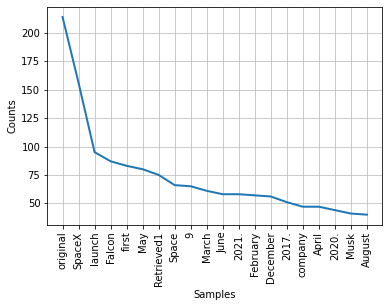

In [ ]:
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
  print(str(key)+":"+str(val))
freq.plot(20,cumulative=False)